In [282]:
import main as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

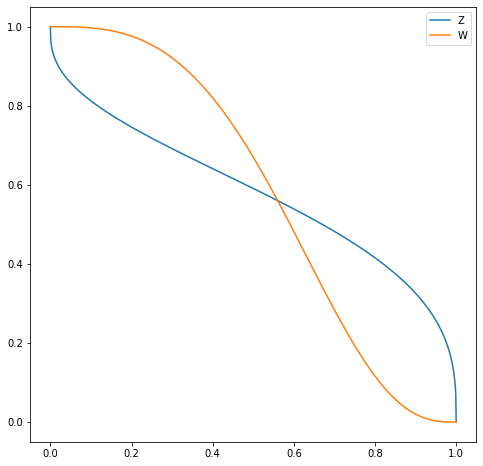

In [284]:
x_lin = np.linspace(0,1,1000).reshape(-1,1)
y_lin = np.apply_along_axis(m.Z,1,x_lin)
y2_lin = np.apply_along_axis(m.W,1,x_lin)
plt.rcParams["figure.figsize"] = (8, 8)
plt.plot(x_lin, y_lin)
plt.plot(x_lin, y2_lin)
plt.legend(["Z", "W"])
#plt.savefig('img/WvZ.svg')

Text(0.5, 1.0, 'Datos originales')

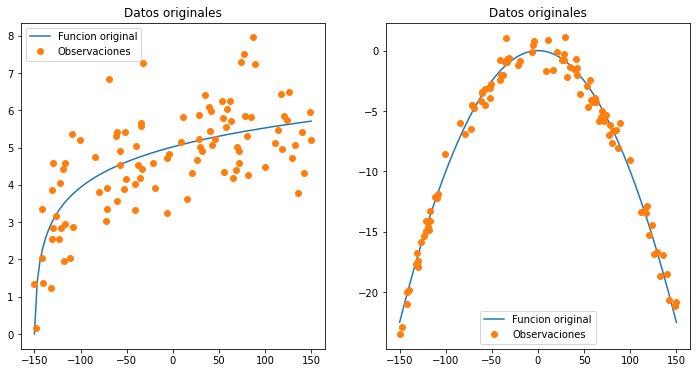

In [288]:
def f1(x):
    return np.log(151+x)

def f2(x):
    return -1/1000*(x)**(2)

xrandom = np.random.uniform(-150,150,100)
xlin = np.linspace(-150,150,100)
x_lin = xlin

Y1 = f1(xrandom) + np.random.normal(0, 1, len(xrandom))
Y2 = f2(xrandom) + np.random.normal(0, 1, len(xrandom))

plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots(1, 2)
ax[0].plot(xlin, f1(xlin))
ax[0].plot(xrandom, Y1, "o")
ax[0].legend(["Funcion original", "Observaciones"])
ax[0].set_title("Datos originales")
ax[1].plot(xlin, f2(xlin))
ax[1].plot(xrandom, Y2, "o")
ax[1].legend(["Funcion original", "Observaciones"])
ax[1].set_title("Datos originales")

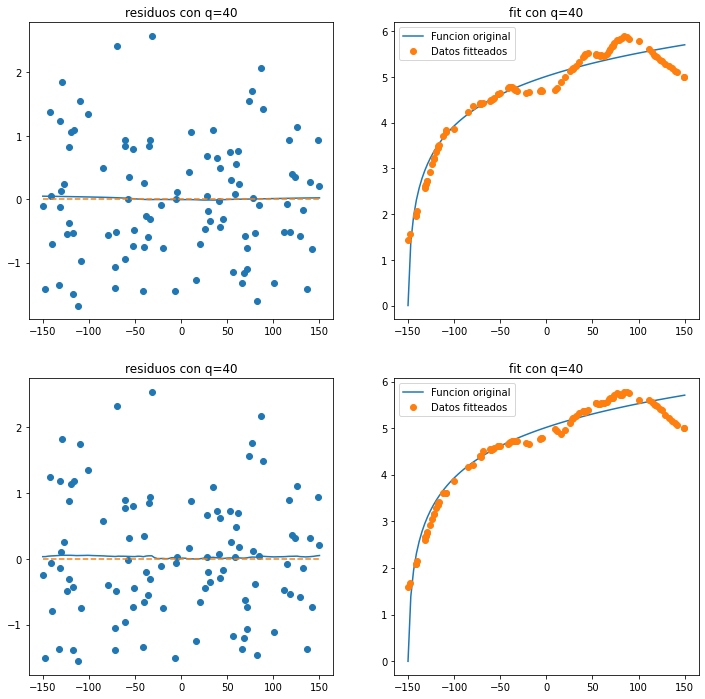

In [297]:
grado = 2
q1 = 40
q2 = 67

y1_fit = m.fit(xrandom.reshape(-1,1), Y1, 25, 1)
y2_fit = m.fit(xrandom.reshape(-1,1), Y2, 25, 1)

y1_res = Y1 - y1_fit
y2_res = Y2 - y2_fit

plt.rcParams["figure.figsize"] = (12, 12)
fig, ax = plt.subplots(2, 2)
x_fit = [m.predict(xrandom.reshape(-1,1), y1_res.reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[0][0].scatter(xrandom, y1_res)
ax[0][0].plot(x_lin, x_fit)
ax[0][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[0][0].set_title("residuos con q="+str(q1))
ax[0][1].plot(xlin, f1(xlin))
ax[0][1].plot(xrandom, y1_fit, "o")
ax[0][1].legend(["Funcion original", "Datos fitteados"])
ax[0][1].set_title("fit con q="+str(q1))
y1_fit = m.fit(xrandom.reshape(-1,1), Y1, 25, 1, weight="Z")
y1_res = Y1 - y1_fit
x_fit = [m.predict(xrandom.reshape(-1,1), y1_res.reshape(-1,1), np.array([i]).reshape(1,1), q2, grado, weight="Z") for i in x_lin]
ax[1][0].scatter(xrandom, y1_res)
ax[1][0].plot(x_lin, x_fit)
ax[1][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[1][0].set_title("residuos con q="+str(q1))
ax[1][1].plot(xlin, f1(xlin))
ax[1][1].plot(xrandom, y1_fit, "o")
ax[1][1].legend(["Funcion original", "Datos fitteados"])
ax[1][1].set_title("fit con q="+str(q1))
# plt.savefig('img/func_pesos_res.svg')

Text(0.5, 1.0, 'fit con q=40')

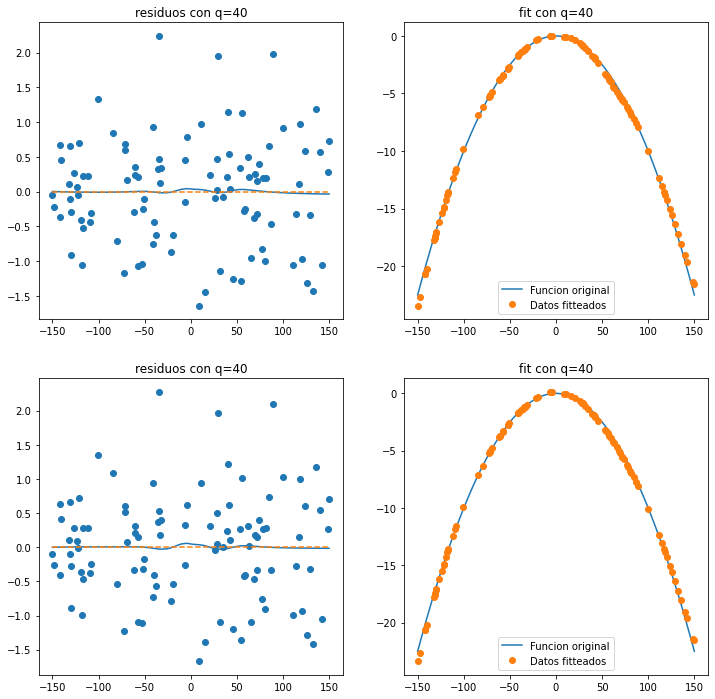

In [291]:
y1_fit = m.fit(xrandom.reshape(-1,1), Y1, q1, grado)
y2_fit = m.fit(xrandom.reshape(-1,1), Y2, q1, grado)

y1_res = Y1 - y1_fit
y2_res = Y2 - y2_fit

plt.rcParams["figure.figsize"] = (12, 12)
fig, ax = plt.subplots(2, 2)
x_fit = [m.predict(xrandom.reshape(-1,1), y2_res.reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[0][0].scatter(xrandom, y2_res)
ax[0][0].plot(x_lin, x_fit)
ax[0][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[0][0].set_title("residuos con q="+str(q1))
ax[0][1].plot(xlin, f2(xlin))
ax[0][1].plot(xrandom, y2_fit, "o")
ax[0][1].legend(["Funcion original", "Datos fitteados"])
ax[0][1].set_title("fit con q="+str(q1))
y2_fit = m.fit(xrandom.reshape(-1,1), Y2, q1, grado, weight="Z")
y2_res = Y2 - y2_fit
x_fit = [m.predict(xrandom.reshape(-1,1), y2_res.reshape(-1,1), np.array([i]).reshape(1,1), q2, grado, weight="W") for i in x_lin]
ax[1][0].scatter(xrandom, y2_res)
ax[1][0].plot(x_lin, x_fit)
ax[1][0].plot(x_lin, np.zeros(len(x_lin)), '--')
ax[1][0].set_title("residuos con q="+str(q1))
ax[1][1].plot(xlin, f2(xlin))
ax[1][1].plot(xrandom, y2_fit, "o")
ax[1][1].legend(["Funcion original", "Datos fitteados"])
ax[1][1].set_title("fit con q="+str(q1))